#This is the main ipynb notebook
based on the py files in /../src_class

# Notes to myself:


# Imports
from `__init__.py`

In [1]:
from google.colab import files, drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import sys

parent_dir = "/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class"
sys.path.append(parent_dir)

import utils
import Cell_Class
import TDL_Class
import UniqueHistory_Class
import read_and_print
import initialize
import ITI


## Reloads

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)
importlib.reload(ITI)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *

# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>

# POR 0 - Initialize the TDL slices

In [3]:
TDL2_Z3_3 = TDL_Class.TDL()
TDL2_Z3_3.initialize_TDL(3200,4800,3)

[3216 3217 3218 3219 3220 3221 3222 3223 3240 3241 3242 3243 3244 3245
 3246 3247 3264 3265 3266 3267 3268 3269 3270 3271 3288 3289 3290 3291
 3292 3293 3294 3295 3312 3313 3314 3315 3316 3317 3318 3319 3336 3337
 3338 3339 3340 3341 3342 3343 3360 3361 3362 3363 3364 3365 3366 3367
 3384 3385 3386 3387 3388 3389 3390 3391 3408 3409 3410 3411 3412 3413
 3414 3415 3432 3433 3434 3435 3436 3437 3438 3439 3456 3457 3458 3459
 3460 3461 3462 3463 3480 3481 3482 3483 3484 3485 3486 3487 3504 3505
 3506 3507 3508 3509 3510 3511 3528 3529 3530 3531 3532 3533 3534 3535
 3552 3553 3554 3555 3556 3557 3558 3559 3576 3577 3578 3579 3580 3581
 3582 3583 3600 3601 3602 3603 3604 3605 3606 3607 3624 3625 3626 3627
 3628 3629 3630 3631 3648 3649 3650 3651 3652 3653 3654 3655 3672 3673
 3674 3675 3676 3677 3678 3679 3696 3697 3698 3699 3700 3701 3702 3703
 3720 3721 3722 3723 3724 3725 3726 3727 3744 3745 3746 3747 3748 3749
 3750 3751 3768 3769 3770 3771 3772 3773 3774 3775 3792 3793 3794 3795
 3796 

#POR 1

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch2_Z3_3_POR1.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch2_Z3_3_POR1.csv'.

There are 202 tapped bins and 187 untapped = 389 = 389

Tapped is: 51.93% 



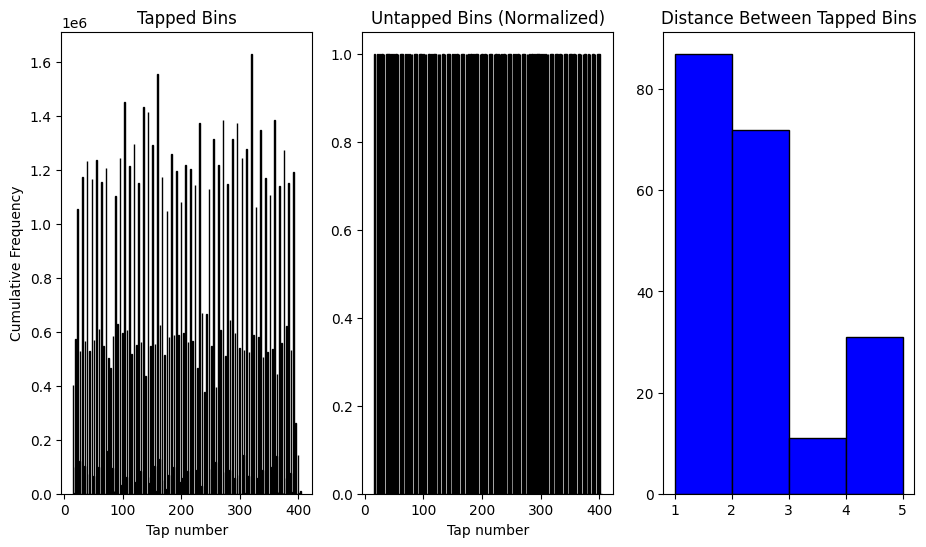

In [4]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch2_Z3_3_POR1.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps1, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps1)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps1)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps1) / len(full_range):.2f}% \n")

# Print Taps
bin1, freq1 = read_and_print.print_taps(data, present_taps1, missing_taps)

## 2) Carry out the POR & error lib construction

In [5]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps1} \n")


# Feed to the TDL
TDL2_Z3_3.feed_physical_nums(present_taps1, 1, verbose = True)


# POR
TDL2_Z3_3.perform_POR()
to_print1 = TDL2_Z3_3.get_logical_assignments()
error_lib1 = TDL2_Z3_3.build_initial_error_lib()


Present taps: 
 [ 15  17  18  19  23  25  26  27  31  33  34  35  39  42  43  47  49  50
  51  55  57  58  59  63  65  66  67  71  73  74  75  77  79  81  82  83
  85  87  89  90  91  95  98  99 101 103 105 106 107 111 114 115 119 122
 123 125 127 129 130 131 135 137 138 139 143 145 146 147 151 153 154 155
 157 159 161 162 163 167 169 170 171 173 175 177 178 179 183 186 187 191
 193 194 195 197 199 201 202 203 207 209 210 211 215 217 218 219 221 223
 225 226 227 229 231 234 235 237 239 241 242 243 247 249 250 251 255 258
 259 263 265 266 267 269 271 274 275 277 279 281 282 283 287 290 291 295
 298 299 303 305 306 307 309 311 313 314 315 319 321 322 323 327 329 330
 331 335 337 338 339 343 345 346 347 351 353 354 355 359 361 362 363 365
 367 369 370 371 373 375 378 379 383 385 386 387 389 391 393 394 395 397
 399 401 402 403] 

Trial 0 data processed and added to unique history. 


--------------------------------------------------------------------------------------------------------
🟡

##3) Results

In [6]:
# Show Results

print("POR result: \n")
for i,j in TDL2_Z3_3.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL2_Z3_3.logical_assignment}")
print(f"{to_print1}")

POR result: 

((np.int64(8),),):[8]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(3), np.int64(4), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 5, 7]
((np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 5, 7]
((np.int64(2), np.int64(3), np.int64(4)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]

Logical bin assignment: 

{0: np.int64(3216), 1: np.int64(3217), 2: np.int64(3218), 3: np.int64(3219), 4: np.int64(3220), 5: np.int64(3221), 6: np.int64(3222), 7: np.int64(3223), 8: np.int64(3240), 9: np.int64(3241), 10: np.int64(3242), 11: np.int64(3243), 12: np.int64(3244), 13: np.int64(3245), 14: np.int64(3246), 15: np.int64(3247), 16: np.int64(3264), 17: np.int64(3265), 18: np.int64(3266), 19: np.int64(3267), 20: np.int64(3268), 21: np.int64(3269), 22: np.int64(3270), 23: np.int64(3271), 24: np.int64(3288), 25: 

#POR 2

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch2_Z3_3_POR2.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch2_Z3_3_POR2.csv'.

There are 365 tapped bins and 26 untapped = 391 = 391

Tapped is: 93.35% 



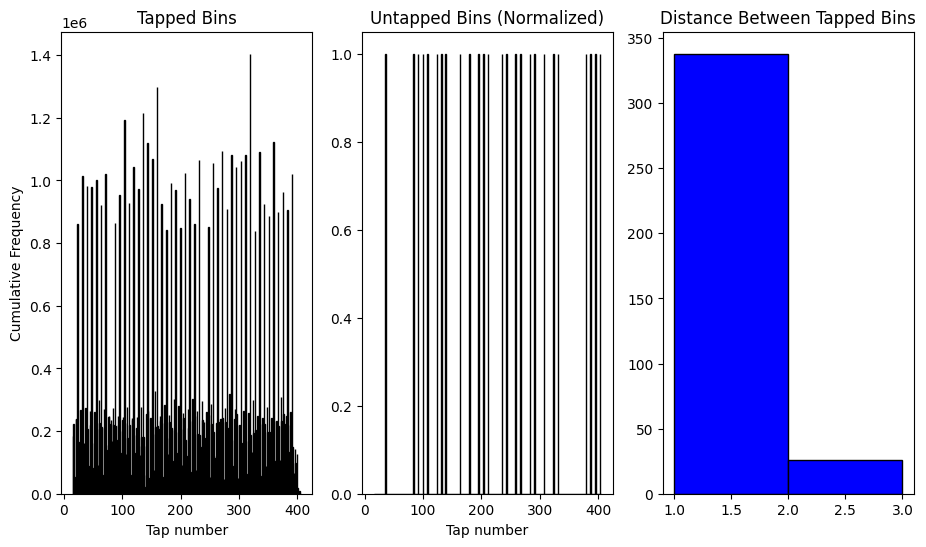

In [7]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch2_Z3_3_POR2.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps2, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps2)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps2)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps2) / len(full_range):.2f}% \n")

# Print Taps
bin2, freq2 = read_and_print.print_taps(data, present_taps2, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [8]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps2} \n")


# Feed to the TDL
TDL2_Z3_3.feed_physical_nums(present_taps2, 2)


# POR
error_lib2 = TDL2_Z3_3.next_POR_n_error_lib(error_lib1, 2)
to_print2 = TDL2_Z3_3.get_logical_assignments()

Present taps: 
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  84  85  86  87  88
  89  90  92  93  94  95  96  97  98 100 101 102 103 104 105 106 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 124 125 126 127 128
 129 130 132 133 134 135 136 137 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 196 197 198 199 200 201 202 204 205 206
 207 208 209 210 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 236 237 238 239 240 241 242 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 259 260 261 262 263 264
 265 266 268 269 270 271 272 273 27

##3) Results

In [9]:
# Show Results

print("POR result: \n")
for i,j in TDL2_Z3_3.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL2_Z3_3.logical_assignment}")
print(f"{to_print2}")

POR result: 

((np.int64(8),), (np.int64(8),)):(8,)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(

# POR3

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch2_Z3_3_POR3.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch2_Z3_3_POR3.csv'.

There are 388 tapped bins and 3 untapped = 391 = 391

Tapped is: 99.23% 



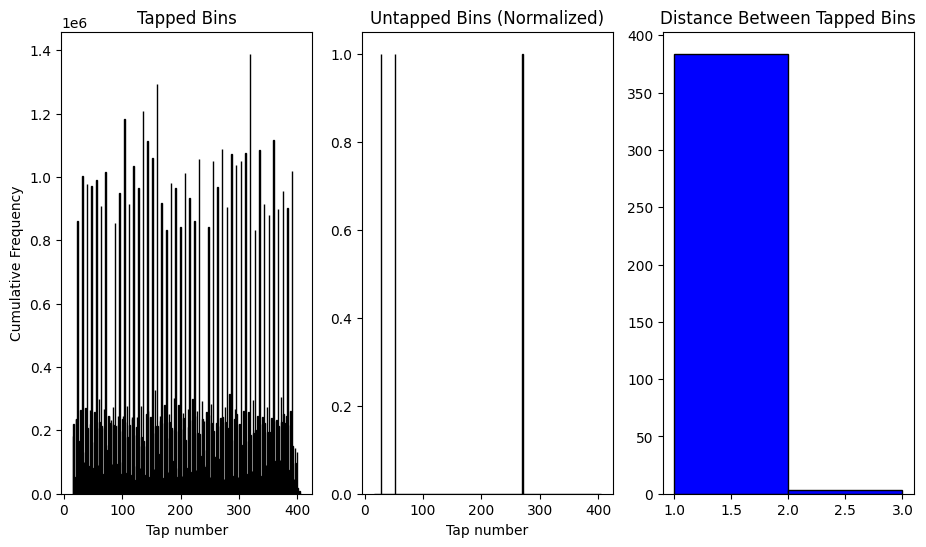

In [10]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch2_Z3_3_POR3.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps3, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps3)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps3)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps3) / len(full_range):.2f}% \n")

# Print Taps
bin3, freq3 = read_and_print.print_taps(data, present_taps3, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [ ]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps3} \n")


# Feed to the TDL
TDL2_Z3_2.feed_physical_nums(present_taps3, 3)


# POR
error_lib3 = TDL2_Z3_2.next_POR_n_error_lib(error_lib2, 3)
to_print3 = TDL2_Z3_2.get_logical_assignments()

Present taps: 
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 25

KeyError: ((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(8)))

##3) Results

In [ ]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_1.logical_assignment}")
print(f"{to_print3}")

POR result: 

((np.int64(8),), (np.int64(8),), (np.int64(8),)):(8,)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(

# Code Density Test

In [11]:
cdc_width, cdc_to_pass = ITI.get_bin_widths(bin3, freq3, to_print2)

# Save this into a .npz file
np.savez("/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/data/TDL2_Z3_3.npz", cdc_to_pass = cdc_to_pass)

In [14]:
print(cdc_to_pass)

{np.int64(3265): np.float64(8.409529405061441), np.int64(3264): np.float64(10.155716677306499), np.int64(3266): np.float64(0.06302734675062618), np.int64(3271): np.float64(2.420816757545606), np.int64(3267): np.float64(2.0243993629128907), np.int64(3269): np.float64(10.969034193113584), np.int64(3270): np.float64(10.981899760578525), np.int64(3268): np.float64(3.7919518374462955), np.int64(3289): np.float64(40.03504496974484), np.int64(3288): np.float64(7.70981903011805), np.int64(3290): np.float64(1.1303120932374642), np.int64(3295): np.float64(6.374261656636652), np.int64(3291): np.float64(0.0), np.int64(3293): np.float64(12.31114046555728), np.int64(3294): np.float64(9.244119230973013), np.int64(3292): np.float64(1.3262217090032278), np.int64(3313): np.float64(46.63354835822528), np.int64(3312): np.float64(6.088014392064722), np.int64(3314): np.float64(1.6297004736816296), np.int64(3315): np.float64(4.5858548868261435), np.int64(3319): np.float64(2.830796411022229), np.int64(3317): 

In [13]:
print(to_print2)

{0: np.int64(3216), 1: np.int64(3217), 2: np.int64(3218), 3: np.int64(3219), 4: np.int64(3220), 5: np.int64(3221), 6: np.int64(3222), 7: np.int64(3223), 8: np.int64(3240), 9: np.int64(3241), 10: np.int64(3242), 11: np.int64(3243), 12: np.int64(3244), 13: np.int64(3245), 14: np.int64(3246), 15: np.int64(3247), 16: np.int64(3265), 17: np.int64(3264), 18: np.int64(3266), 19: np.int64(3271), 20: np.int64(3267), 21: np.int64(3269), 22: np.int64(3270), 23: np.int64(3268), 24: np.int64(3289), 25: np.int64(3288), 26: np.int64(3290), 27: np.int64(3295), 28: np.int64(3291), 29: np.int64(3293), 30: np.int64(3294), 31: np.int64(3292), 32: np.int64(3313), 33: np.int64(3312), 34: np.int64(3314), 35: np.int64(3315), 36: np.int64(3319), 37: np.int64(3317), 38: np.int64(3318), 39: np.int64(3316), 40: np.int64(3337), 41: np.int64(3338), 42: np.int64(3336), 43: np.int64(3343), 44: np.int64(3339), 45: np.int64(3341), 46: np.int64(3342), 47: np.int64(3340), 48: np.int64(3361), 49: np.int64(3360), 50: np.in

In [12]:
print(bin3)
print(present_taps3)
print(freq3)

[ 15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210.
 211. 

# Endpoint - to print out

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print2, 3)

Type the ID for this txt file (e.g. '25_02_14'): 25_04_23_POR3
The text file has been created in this directory under the name: Bin_sequence_25_04_23_POR3.txt.


In [ ]:
files.download("Bin_sequence_25_04_23_POR3.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_outcome_of_notebook = to_print2

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print3, 1)

# Debug Prison

In [ ]:
r1,s,e = utils.split_into_cells(present_taps1, logical_assignment = TDL2_Z3_3.logical_assignment, TDL_start = TDL2_Z3_3.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r1.items():
  print(f"{i}:{j}")

Starting Cell num: 6, Ending Cell num: 153
6:[np.int64(8)]
9:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
12:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
15:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
18:[np.int64(3), np.int64(4), np.int64(8)]
21:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
24:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
27:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
30:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
33:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
36:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
39:[np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
42:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
45:[np.int64(3), np.int64(4), np.int64(8)]
48:[np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
51:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
54:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
57:[np.int64(2), np.int64(3), np.int64(4), np.

In [ ]:
r2,s,e = utils.split_into_cells(present_taps2, logical_assignment = TDL2_Z3_3.logical_assignment, TDL_start = TDL2_Z3_3.TDL_start)
print(f"Starting Cell num: {s}. Ending Cell num {e}")

for i,j in r2.items():
  print(f"{i}:{j}")

Starting Cell num: 6. Ending Cell num 153
6:[np.int64(8)]
9:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
12:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
15:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
18:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
21:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
24:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
27:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
30:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
33:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8

In [ ]:
r3,s,e = utils.split_into_cells(present_taps3, logical_assignment = TDL2_Z3_3.logical_assignment, TDL_start = TDL2_Z3_3.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r3.items():
  print(f"{i}:{j}")

Starting Cell num: 6, Ending Cell num: 153
6:[np.int64(8)]
9:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
12:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
15:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
18:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
21:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
24:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
27:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
30:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
33:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(

In [ ]:
for i,j in TDL2_Z3_3.cells.items():
  print(f"{i}:{j}")

6:<Cell_Class.Cell object at 0x7e60ac096ad0>
9:<Cell_Class.Cell object at 0x7e60abaeed90>
12:<Cell_Class.Cell object at 0x7e60abf174d0>
15:<Cell_Class.Cell object at 0x7e60a3b7aad0>
18:<Cell_Class.Cell object at 0x7e60a3ff0490>
21:<Cell_Class.Cell object at 0x7e60dffa0050>
24:<Cell_Class.Cell object at 0x7e60f4162190>
27:<Cell_Class.Cell object at 0x7e60a3de2490>
30:<Cell_Class.Cell object at 0x7e60abb244d0>
33:<Cell_Class.Cell object at 0x7e60abb26990>
36:<Cell_Class.Cell object at 0x7e60abb24710>
39:<Cell_Class.Cell object at 0x7e60abb27710>
42:<Cell_Class.Cell object at 0x7e60abb24a50>
45:<Cell_Class.Cell object at 0x7e60abb24990>
48:<Cell_Class.Cell object at 0x7e60abb25cd0>
51:<Cell_Class.Cell object at 0x7e60a3b41950>
54:<Cell_Class.Cell object at 0x7e60a3b43e50>
57:<Cell_Class.Cell object at 0x7e60a3b40f90>
60:<Cell_Class.Cell object at 0x7e60a3b34190>
63:<Cell_Class.Cell object at 0x7e60a3b376d0>
66:<Cell_Class.Cell object at 0x7e60a3b34750>
69:<Cell_Class.Cell object at 0x7e60

In [ ]:
code_density_test = freq3 / np.sum(freq3) * 4000  # in units of ps
for i in code_density_test:
  print(i)

0.0058588900736735346
1.846920597498587
0.0
10.07781066696695
10.042326582730427
1.2302251681309502
47.840388903673265
8.220826008293423
0.5044315356978923
4.9226961388367005
0.9643071573677674
11.406077745604938
10.806297498869359
1.1933708596030037
43.47598828992145
6.159630681084277
3.0314086237640856
3.326999077803615
1.53011529149874
13.866906074774816
9.414244117009925
0.0684639654576851
43.758018248387245
9.621100735901399
0.7119968912918266
3.66431049906132
1.611431015827709
11.602775805094478
10.585266145928674
2.036484040850024
42.85801713448939
9.234130496357961
1.4990726239309695
2.2284099398763297
0.10026261884141323
13.894452307943782
10.89096791025664
0.9916643940827432
43.0337838366996
9.964649040140756
0.7713890269580171
4.2753832839227695
1.638599256088695
13.625557603030265
9.414669359031402
3.2853726088124344
43.64126568893525
10.715059460705943
1.9451515044596135
3.991888602938566
1.801608697654612
10.53848952356628
10.436147943730983
0.8676354711521541
48.54784988

In [ ]:
len(np.where(code_density_test < 0.5)[0]) # Get rid of these ones; these post processing can be done later during ITI.

38

# Reload (same thing)

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *
# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>